# Experimental Data Manipulation
Thomas Hansen Viuff, 2016
### Description
This notebook imports test data from a \*.txt file, plots the original and altered data, and saves everything to a \*.npz file.
The \*.txt file contains tab delimitered data with comma as the decimal seperator:

    Deformation Experiment Logfile
    Notes Notes
    
    
    Date (dd/mm/yyyy):    15/11/2016	Time (HH:MM:SS.dddd):    10:24:27
    Time (HH:MM:SS,dddd)	Seq.Time(s.dddd)	 Force (kN)	 Deformation 1 (mm)	 Deformation 2 (mm)	 Deformation 3 (mm)
    
    10:24:27,5594	-0,0010	0,210000	0,017413	12,730394	15,222683
    10:24:27,5844	0,0240	0,210000	0,017413	12,728751	15,219395
    10:24:27,6094	0,0490	0,210000	0,017413	12,733682	15,224327
    ...

The following thigs still needs to be clarified in the code:
* [ ] Import without removinf first column of data file
* [ ] Sharing the notebook with @filippo, check [this page](http//www.google.com) for that
* [x] Save and load data :+1:

### Import python packages

In [1]:
import pandas as pd                # used for importing *.txt
import numpy as np                 # used for matrix operations
import matplotlib.pyplot as plt    # used for plots

### Import data from \*.txt file

In [2]:
floc = 'DATA/'                     # folder
fname = 'E10CON3'                  # filename
fext = '.txt'                      # file extention
data = pd.io.parsers.read_table(floc+fname+fext, decimal=",", header=3)        # import data from file
data.drop(data.columns[[0]], axis=1, inplace=True)                             # remove the first column
print(data.dtypes)                                                             # print data type information
dataType = data.dtypes                                                         # store data type info
dataValue = data.values                                                        # store data values

Seq.Time(s.dddd)       float64
 Force (kN)            float64
 Deformation 1 (mm)    float64
 Deformation 2 (mm)    float64
 Deformation 3 (mm)    float64
dtype: object


### Rename data

In [3]:
DATA = dataValue
t = DATA[::,0]    # time [s]
F = DATA[::,1]    # force [kN]
S1 = DATA[::,2]   # deformation 1 [mm]
S2 = DATA[::,3]   # deformation 2 [mm]
S3 = DATA[::,4]   # deformation 3 [mm]

### Plot original data

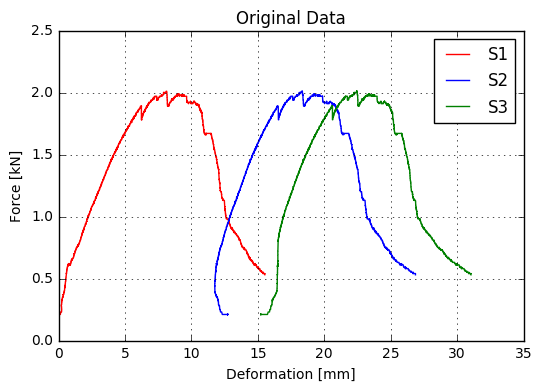

In [4]:
plt.plot(S1, F, 'r-', label='S1')     # plot F-S1 relationship with x=S1 and y=F, and give it the legend "S1"
plt.plot(S2, F, 'b-', label='S2')
plt.plot(S3, F, 'g-', label='S3')
plt.xlabel('Deformation [mm]')        # write text for x-axis
plt.ylabel('Force [kN]')              # write text for y-axis
plt.legend(loc='upper right')         # position and plot legend
plt.title('Original Data')            # write title for plot
plt.grid(True)                        # add grid lines
plt.show()                            # actually plot the graph. Without this line nothing will be shown!

### Remove initial value

In [5]:
S1 = S1-S1[0]    # subtract the first value in the array from the entire array
S2 = S2-S2[0]
S3 = S3-S3[0]

### Add an initial zero value

In [6]:
F = np.insert(F,0,0)       # np.insert(array,index,value)
S1 = np.insert(S1,0,0)     # inserts the "value" before the "index" in the "array"
S2 = np.insert(S2,0,0)
S3 = np.insert(S3,0,0)

### Remove data after failure

In [7]:
failureLoad = 1.0                   # remove values after F equals to failureLoad. If zero, then nothing happends!
if (failureLoad != 0):              # if failureLoad is different from zero, do the following:
    allIndF = [i for (i, val) in enumerate(F) if val == failureLoad]          # find all indices where F equals the failureLoad
    lastIndF = max(allIndF)                                                   # find the highest index (last value)
    S1 = S1[:lastIndF+1]                                                      # take out values from index 0 to index lastIndF
    S2 = S2[:lastIndF+1]                                                      # the +1 is because python translates a[0:5] as
    S3 = S3[:lastIndF+1]                                                      # a[0], a[1], a[2], a[3], a[4]
    F = F[:lastIndF+1]

### Plot altered data

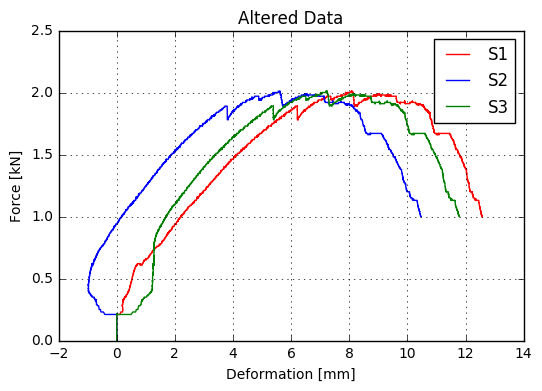

In [8]:
plt.plot(S1, F, 'r-', label='S1')             # same comments as for plotting the original data
plt.plot(S2, F, 'b-', label='S2')
plt.plot(S3, F, 'g-', label='S3')
plt.xlabel('Deformation [mm]')
plt.ylabel('Force [kN]')
legend = plt.legend(loc='upper right')
plt.title('Altered Data')
plt.grid(True)
plt.show()

### Save data

In [9]:
np.savez(floc+fname,DATA=DATA,t=t,F=F,S1=S1,S2=S2,S3=S3)      # *.npz file
del DATA                                                      # delete variable from memory
del t
del F
del S1
del S2
del S3

### Load data

In [10]:
npzfile = np.load(floc+fname+'.npz')                          # loads data from .npz file and store it in npzfile
print(npzfile.files)                                          # print names of files (data) contained in npzfile
DATA = npzfile['DATA']                                        # assign the specified file to the array DATA
t = npzfile['t']
F = npzfile['F']
S1 = npzfile['S1']
S2 = npzfile['S2']
S3 = npzfile['S3']

['F', 'S2', 'DATA', 't', 'S1', 'S3']


### Plot loaded data

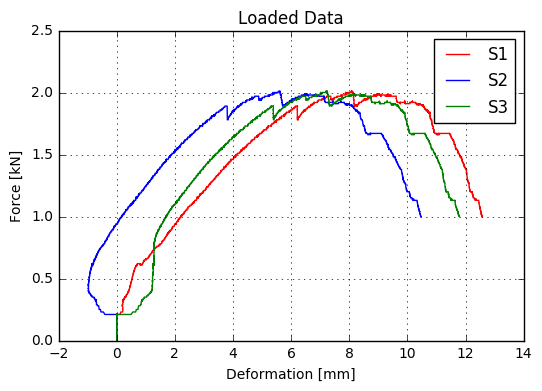

In [11]:
plt.plot(S1, F, 'r-', label='S1')                             # same comments as for plotting the original data
plt.plot(S2, F, 'b-', label='S2')
plt.plot(S3, F, 'g-', label='S3')
plt.xlabel('Deformation [mm]')
plt.ylabel('Force [kN]')
legend = plt.legend(loc='upper right')
plt.title('Loaded Data')
plt.grid(True)
plt.show()